## Reddit Networks
Using the [Reddit networks dataset](http://dynamics.cs.washington.edu/nobackup/reddit/) select the subreddit of your favorite  TV show. Using the data of the selected subreddit, 
answer the following questions:

In [3]:
!mkdir ./datasets
!mkdir ./datasets/seinfeld
!wget http://dynamics.cs.washington.edu/nobackup/reddit/RedditWritesSeinfeld.tar.gz -O          ./datasets/seinfeld/sein.tar.gz
!tar -xf ./datasets/seinfeld/sein.tar.gz -C ./datasets/seinfeld


--2022-04-06 09:28:57--  http://dynamics.cs.washington.edu/nobackup/reddit/RedditWritesSeinfeld.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 140.142.5.13, 140.142.5.5, ...
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2672007 (2.5M) [application/x-gzip]
Saving to: ‘./datasets/seinfeld/sein.tar.gz’

./datasets/seinfeld 100%[===================>]   2.55M   435KB/s    in 6.9s    

2022-04-06 09:29:05 (376 KB/s) - ‘./datasets/seinfeld/sein.tar.gz’ saved [2672007/2672007]



In [4]:
import turicreate as tc
g = tc.load_sgraph('./datasets/seinfeld/RedditWritesSeinfeld.2014-09-05.2016-10-31.sgraph')
g.summary()

{'num_edges': 4867, 'num_vertices': 3194}

**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)

In [5]:
m = tc.degree_counting.create(g)
g2 = m['graph']
g2


SGraph({'num_edges': 4867, 'num_vertices': 3194})
Vertex Fields:['__id', 'in_degree', 'out_degree', 'total_degree']
Edge Fields:['__src_id', '__dst_id']

In [6]:
sf = g2.get_vertices()
sf

__id,in_degree,out_degree,total_degree
Racing2733,1,1,2
StolenLampy,0,0,0
RanzhaVEmodrach,0,0,0
MichaelGaryScotch,1,0,1
readmeanything,1,1,2
TroperCase,0,1,1
zettaswag,1,1,2
Mrquizmo,0,0,0
RosaPrksCalldShotgun,0,1,1
One_True_Statement,1,0,1


In [8]:
hist = tc.visualization.histogram(sf['total_degree'], 'Total Degree', 'Count', 'Degree distribution')
hist

Materializing SArray

**Task 2:** Create a subgraph of the top-40 users according to a selected centrality algorithm. Draw the subgraph using circlular layout (15pt)

In [10]:
pr = tc.pagerank.create(g)

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 2570.39               |

| 2         | 869.568               |

| 3         | 360.124               |

| 4         | 188.704               |

| 5         | 109.677               |

| 6         | 72.255                |

| 7         | 50.9706               |

| 8         | 37.0627               |

| 9         | 27.8954               |

| 10        | 21.3122               |

| 11        | 16.4556               |

| 12        | 12.8324               |

| 13        | 10.0673               |

| 14        | 7.94408               |

| 15        | 6.30257               |

| 16        | 5.02239               |

| 17        | 4.02035               |

| 18        | 3.23194               |

| 19        | 2.6088                |

| 20        | 2.11408               |

+-----------+-----------------------+

In [13]:
sf = pr['pagerank'].sort('pagerank', ascending = False)[:40]
sf

__id,pagerank,delta
Awesomeautism,24.840658987578045,0.018413534080320204
SoupIsNotAMeal,15.70915005593303,0.014113569720132446
exitpursuedbybear,8.465383498855681,0.0059321138337224966
GravityTortoise,7.9273896119144736,0.006839013051009424
Mardak5150,7.71949648357076,0.006672682355094217
vaclavhavelsmustache,6.596607447897441,0.004419878733142646
pohatu771,6.353737603951408,0.007112154344955712
fine-rusty-knife,5.457961825467558,0.00713921267501938
Iron_Chic,5.453713238218745,0.0038782621625204072
RennisDeynolds,5.446738652925882,0.0054401902494074506


In [5]:
import networkx as nx
def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g




In [ ]:
ng = sgraph2nxgraph(g)
print("Networkx: %s" % nx.info(ng))

In [21]:
sg = ng.subgraph(sf['__id'])
print("Networkx: %s" % nx.info(sg))

Networkx: Name: 
Type: DiGraph
Number of nodes: 40
Number of edges: 101
Average in degree:   2.5250
Average out degree:   2.5250


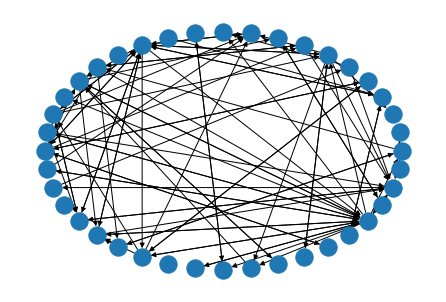

In [22]:
nx.draw_circular(sg)

**Task 3:** Calculate the PageRank, triangles, and average shortest path of each vertex in the graph (15pt)

In [17]:
import turicreate as tc
import networkx as nx
def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g


g = tc.load_sgraph('./datasets/seinfeld/RedditWritesSeinfeld.2014-09-05.2016-10-31.sgraph')


ng = sgraph2nxgraph(g, is_directed=False)
print("Networkx: %s" % nx.info(ng))
pr = nx.pagerank(ng)
print('page rank: %s' %list(pr.items())[:5])

tr = nx.triangles(ng)
print('Triangles : %s' %list(tr.items())[:20])


print('Graph is not conected I will computer shortest path average on each of the graph component')
for C in (ng.subgraph(c).copy() for c in nx.connected_components(ng)):
    print(nx.average_shortest_path_length(C))


Networkx: Name: 
Type: Graph
Number of nodes: 3194
Number of edges: 4136
Average degree:   2.5899
page rank: [('Racing2733', 0.00016751630490880042), ('StolenLampy', 5.709826612387712e-05), ('RanzhaVEmodrach', 5.709826612387712e-05), ('MichaelGaryScotch', 0.00013960849254957718), ('readmeanything', 0.00024061451783017799)]
Triangles : [('Racing2733', 0), ('StolenLampy', 0), ('RanzhaVEmodrach', 0), ('MichaelGaryScotch', 0), ('readmeanything', 0), ('TroperCase', 0), ('zettaswag', 0), ('Mrquizmo', 0), ('RosaPrksCalldShotgun', 0), ('One_True_Statement', 0), ('SlimTidy', 0), ('Kryeiszkhazek', 1), ('sharifshiblu', 0), ('wiz0floyd', 0), ('starecontest', 0), ('PrestonTheGuy', 1), ('euphoneus', 0), ('addama', 0), ('SuperSmashBrosPele', 0), ('JackMoney', 0)]
Graph is not conected I will computer shortest path average on each of the graph component
4.6397276620422
0
0
0
0
1.0
0
0
0
0
1.6666666666666667
0
0
0
1.0
0
0
0
0
0
0
0
0
1.3333333333333333
0
0
0
1.6666666666666667
0
0
0
0
0
0
0
0
1.0
0
0
0

**Task 4:** Use Cytoscape and Gephi to visualize the network, where each vertex size is correlates to its degree (15pt)

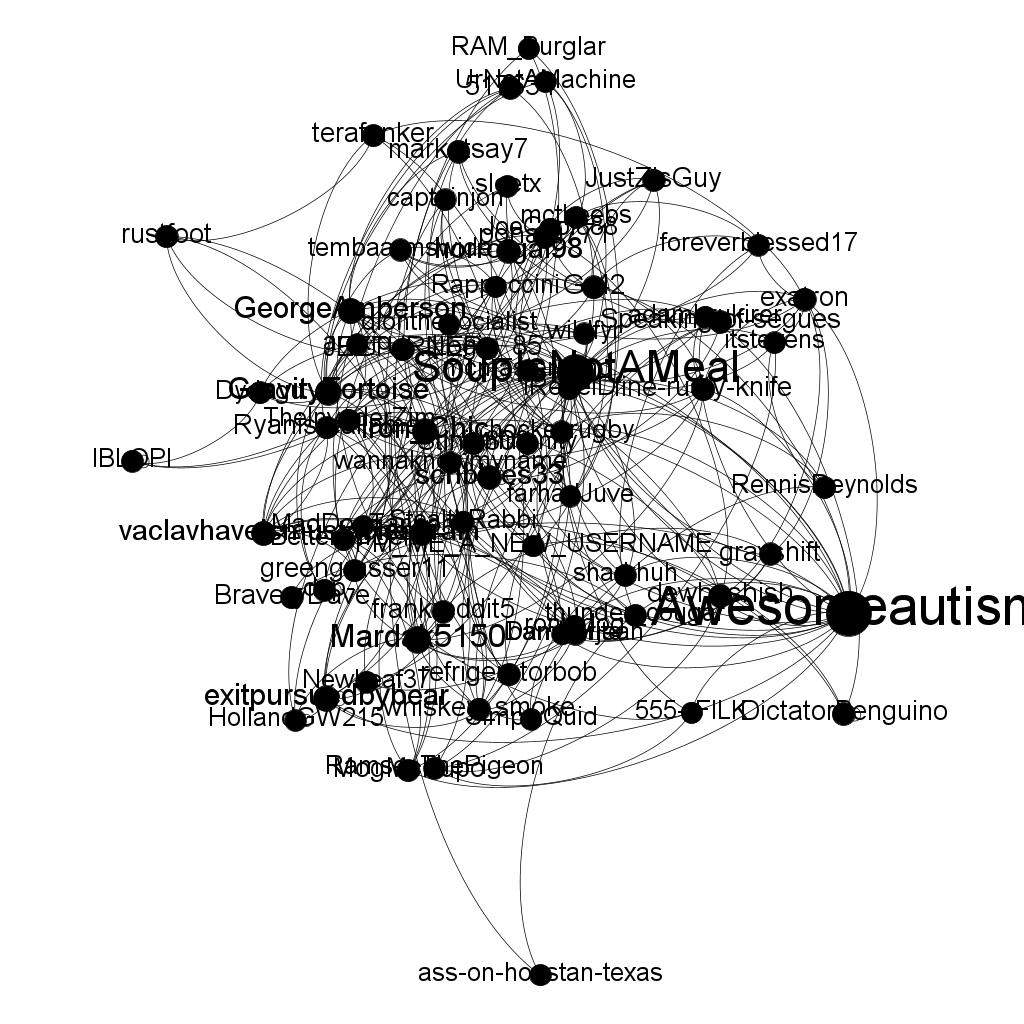

In [21]:
ng = sgraph2nxgraph(g, is_directed=False, add_edges_attributes=False, add_vertices_attributes=False)

nx.write_gexf(ng, "./datasets/ng.gexf")
nx.write_gml(ng, "./datasets/ng.gml")
from PIL import Image

image = Image.open('sceinfeld.png')
image.show()






**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of verticies and edges in the subgraph (5pt)

number of vertex = 3, number of edges =3


Traceback (most recent call last):
  File "/home/amityu/pycharm-2021.3.2/plugins/python/helpers/pydev/_pydevd_bundle/pydevd_frame.py", line 861, in trace_dispatch
    result = plugin_manager.cmd_step_over(main_debugger, frame, event, self._args, stop_info, stop)
  File "/home/amityu/pycharm-2021.3.2/plugins/python/helpers-pro/jupyter_debug/pydev_jupyter_plugin.py", line 144, in cmd_step_over
    if _is_inside_jupyter_cell(frame, pydb):
  File "/home/amityu/pycharm-2021.3.2/plugins/python/helpers-pro/jupyter_debug/pydev_jupyter_plugin.py", line 209, in _is_inside_jupyter_cell
    if is_cell_filename(filename):
  File "/home/amityu/pycharm-2021.3.2/plugins/python/helpers-pro/jupyter_debug/pydev_jupyter_plugin.py", line 220, in is_cell_filename
    ipython_shell = get_ipython()
NameError: name 'get_ipython' is not defined


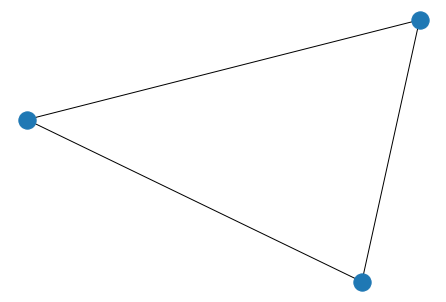

In [27]:
def sub_neigbours(h,node='PrestonTheGuy'):

    neighbours = [n for n in h.neighbors(node)]
    neighbours.append(node)
    return nx.subgraph(h,neighbours)


new_graph = sub_neigbours(ng)
nx.draw(new_graph)
print('number of vertex = %d, number of edges =%d'%(nx.number_of_nodes(new_graph), nx.number_of_edges(new_graph)))


**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges

In [28]:
!wget http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz -O ./datasets/fcis.tar.gz

--2022-04-06 21:23:02--  http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 140.142.5.13, 140.142.5.5, ...
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6852261483 (6.4G) [application/x-gzip]
Saving to: ‘./datasets/fcis.tar.gz’

./datasets/fcis.tar 100%[===================>]   6.38G   149KB/s    in 8h 32m  

2022-04-07 05:55:45 (218 KB/s) - ‘./datasets/fcis.tar.gz’ saved [6852261483/6852261483]



In [29]:
!tar -xf ./datasets/fcis.tar.gz -C ./datasets


In [16]:
import turicreate as tc
from tqdm.notebook import tqdm
e_sf = tc.load_sframe('./datasets/FCIS/fcis_chess.interactions.sframe')[:3000]
v_sf = tc.load_sframe('./datasets/FCIS/fcis_chess.vertices.sframe')[:3000]
e_sf.print_rows(5)
v_sf.print_rows(5)
sg = tc.SGraph(vertices = v_sf, edges=e_sf, vid_field='v_id', dst_field='dst_id', src_field='src_id')
'''for r in tqdm(v_sf):
    sg.add_vertices(tc.Vertex(r['v_id']))
for r in tqdm(e_sf):
    sg.add_edges(tc.Edge(r['src_id'], r['dst_id']))'''
print (sg.summary())


+---------------------+---------+----------+
|       datetime      |  src_id |  dst_id  |
+---------------------+---------+----------+
| 1999-01-01 03:13:00 |  ranger |   game   |
| 1999-01-01 03:13:00 |   game  |  ranger  |
| 1999-01-01 12:51:00 | jovanka |  abpdoc  |
| 1999-01-01 12:51:00 |  abpdoc | jovanka  |
| 1999-01-02 07:15:00 |   Pepo  | HugoPrat |
+---------------------+---------+----------+
[3000 rows x 3 columns]

+---------------------+----------+---------------------+
|       mindate       |   v_id   |       maxdate       |
+---------------------+----------+---------------------+
| 1999-01-01 03:13:00 |  ranger  | 2014-07-29 01:30:00 |
| 1999-01-01 03:13:00 |   game   | 1999-12-30 23:58:00 |
| 1999-01-01 12:51:00 |  abpdoc  | 2013-11-05 02:53:00 |
| 1999-01-01 12:51:00 | jovanka  | 2005-05-13 19:50:00 |
| 1999-01-02 07:15:00 | HugoPrat | 2001-06-25 08:18:00 |
+---------------------+----------+---------------------+
[3000 rows x 3 columns]

{'num_edges': 3000, 'num_vertice

In [18]:

m = tc.pagerank.create(sg)
v_sf = m['pagerank']
v_sf.print_rows(10)
print ('Top 10 central vercies according to pagerank algo.')
v_sf.sort('pagerank', ascending = False)[:10]


Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 1677.11               |

| 2         | 506.689               |

| 3         | 390.837               |

| 4         | 318.971               |

| 5         | 264.191               |

| 6         | 220.434               |

| 7         | 184.568               |

| 8         | 154.983               |

| 9         | 130.453               |

| 10        | 109.939               |

| 11        | 92.7637               |

| 12        | 78.3262               |

| 13        | 66.1877               |

| 14        | 55.9622               |

| 15        | 47.3427               |

| 16        | 40.0642               |

| 17        | 33.9237               |

| 18        | 28.7378               |

| 19        | 24.3549               |

| 20        | 20.6461               |

+-----------+-----------------------+

+------------+----------+-------+
|    __id    | pagerank | delta |
+------------+----------+-------+
| Sillopsism |   0.15   |  0.0  |
| FireBlade  |   0.15   |  0.0  |
|   amssp    |   0.15   |  0.0  |
|    JMC     |   0.15   |  0.0  |
| LeapyFrog  |   0.15   |  0.0  |
|  sassyboy  |   0.15   |  0.0  |
|   sanjiv   |   0.15   |  0.0  |
| darkshadow |   0.15   |  0.0  |
| Tranrovers |   0.15   |  0.0  |
|   Bregg    |   0.15   |  0.0  |
+------------+----------+-------+
[3000 rows x 3 columns]

Top 10 central vercies according to pagerank algo.


__id,pagerank,delta
special,3.140372609761323,0.13289942726287585
MansBlo,3.083492560229503,0.05983306035415703
Wronskian,3.040413936594859,0.03923237444933525
Verkkis,2.819103477896861,0.06620404291556703
kemar,2.7782398944295665,0.05399160915472789
Benkku,2.773903893848219,0.04052655530480154
JagorCrafty,2.752255142446722,0.02198736539155899
Computer,2.750250494651513,0.02606771219206605
hemphandle,2.6246829449026396,0.05537134721799086
roylev,2.6205496151497565,0.11113717522741862


**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

### Additional Questions for Practice

**Task 1:** Visualize the distribution of the network's strongly and weakly connected components.

**Task 2:** Using Cytoscape, visualize the network's maximal strongly connected component (or part of it)

**Task 3:** Draw a subgraph of all the vertices that have at least one reciprocal link, i.e., all the vertices where there is at least one vertex _u_ so that both links (u,v) and (v,u) exists

**Task 4:** Split the network into communities, and find the second most central vertex in each community
    

**Task 5:** Find the top-10 most central players at [The Free Internet Chess Server](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz).
    Visualize part of the network.
    
**Note:** The network has 429,747,476 edges